## Q1
Write a brief about what function the method LinearRegression().fit() performs

## A1

#### Import The Libraries

In [141]:

# importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from tabulate import tabulate
from sklearn import model_selection as ms
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



#### Load the Train Data Set

In [142]:
# load the training data set 

with open('data/train.pkl', 'rb') as f:
    unpickler = pkl.Unpickler(f)
    train_file = unpickler.load()
    train_ = pd.DataFrame(train_file, columns=['Area', 'Price'])

print(tabulate(train_, headers='keys', tablefmt='psql'))

#### Load The Test Data Set

In [143]:
# loading the test data set 

with open('data/test.pkl', 'rb') as f:
    unpickler = pkl.Unpickler(f)
    test_file = unpickler.load()
    test_ = pd.DataFrame(test_file, columns=['Area', 'Price'])

print(tabulate(test_, headers='keys', tablefmt='psql'))

##### Load the training data
[-] Extracted the data from the training data set and generated 16 different training models ( with each model was found to contain 500 data set )

In [144]:
# storing the training data set 
# takking random sample of size 500 from the data set

training_samples = []
training_samples.append(train_.sample(frac=1/16))
for i in range(1, 16):
    temp = train_.drop(training_samples[0].index)
    #print(len(temp))
    training_samples.append(train_.sample(frac=1/(16-i)))



traning_samples is array of length 16 that contains the training data-set, later this array is used to find models 

In the code below, the trained_models is a 2D array that is going to store the trained model based on the training set

In [145]:

# trained models we have , the coefficients and the intercepts
# using PolynomialFeatures to create a polynomial features
# using LinearRegression to train the model
# storing the learned model in array object 

trained_models = []
for j in range(1, 16):
    trained_model_poly = []
    poly = PolynomialFeatures(degree=j)
    for i in range(0, 16):
        x_train = np.array(training_samples[i]['Area']).reshape(-1, 1)
        x_transform_train = poly.fit_transform(x_train)
        y_train = np.array(training_samples[i]['Price']).reshape(-1, 1)
        temp = LinearRegression(fit_intercept=False).fit(
            x_transform_train, y_train)
        trained_model_poly.append(temp)
    trained_models.append(trained_model_poly)

# jth model for ith degree polynomial 
for i in range(0, 15):
    for j in range(0, 16):
        print(trained_models[i][j].coef_)


`trained_models[i][j]` stores the training model for polynomial of degree (i+1) and training set j. There are 15 different polynomial of degree 1,2,....15 and for each polynomial we have found a training model based on 16 different data sets.

So `i lies in range [0,14]` and `j lies in range[0,15]`

Procedure to get the training model
1. We manipulated the `training_samples[i]['Area']` into an array of arrays(containing only 1 element).
2. The new array we got is passed to function `poly.fit_transform()`, this fnction will give us the values of 1, x, x^2, ....x^i for each x present in the passed array. This is stroed in x_transform_train
3. Similarily we manipulated the `training_samples[i]['Price']`. This is stroed in y_train.
4. We passed the x_transform_train and y_train to the function `LinearRegression()` which will give us a best fit curve. Which is stored in training_models array

Store the test data <br>
And <br>
Finding Bias, variance, MSE and irreducible error

In [146]:

# store the x and y values of the test data set 

x_test = np.array(test_['Area']).reshape(-1, 1)
y_test = np.array(test_['Price']).reshape(-1, 1)

# store the bias of the data sets
# for each degree of polynomial we'll have 16 bias values and we'll have 15 such values
# bias_poly[15][16]
# storing them in an array of array

# store the predicted values of y for each degree of polynomial
y_predicted = []
bias = []
sq_bias = []
variance = []
mse = []
irr_err = []
for i in range(1, 16):
    poly_ = PolynomialFeatures(degree=i)
    x_transform_test = poly_.fit_transform(x_test)
    temp = []
    sum = np.zeros([len(y_test)]).reshape(-1, 1)
    square = np.zeros([len(y_test)]).reshape(-1, 1)
    mse_err = np.zeros([len(y_test)]).reshape(-1, 1)
    variance_subpart = np.zeros([len(y_test)]).reshape(-1, 1)

    for j in range(16):
        temp.append(trained_models[i-1][j].predict(x_transform_test))
        sum = sum + temp[j]
        square = square + np.square(temp[j])
        mse_err = mse_err + np.square(y_test - temp[j])
    predicted_values = sum/16
    variance_subpart = square/16 - np.square(predicted_values)
    mse_err = mse_err/16
    bias.append(np.mean(abs(predicted_values - y_test)))
    sq_bias.append(np.mean(np.square(predicted_values - y_test)))
    variance.append(np.mean(variance_subpart))
    mse.append(np.mean(mse_err))
    irr_err.append(mse[i-1] - variance[i-1] - sq_bias[i-1])
    y_predicted.append(predicted_values)



### Actual Values VS Predicted Values

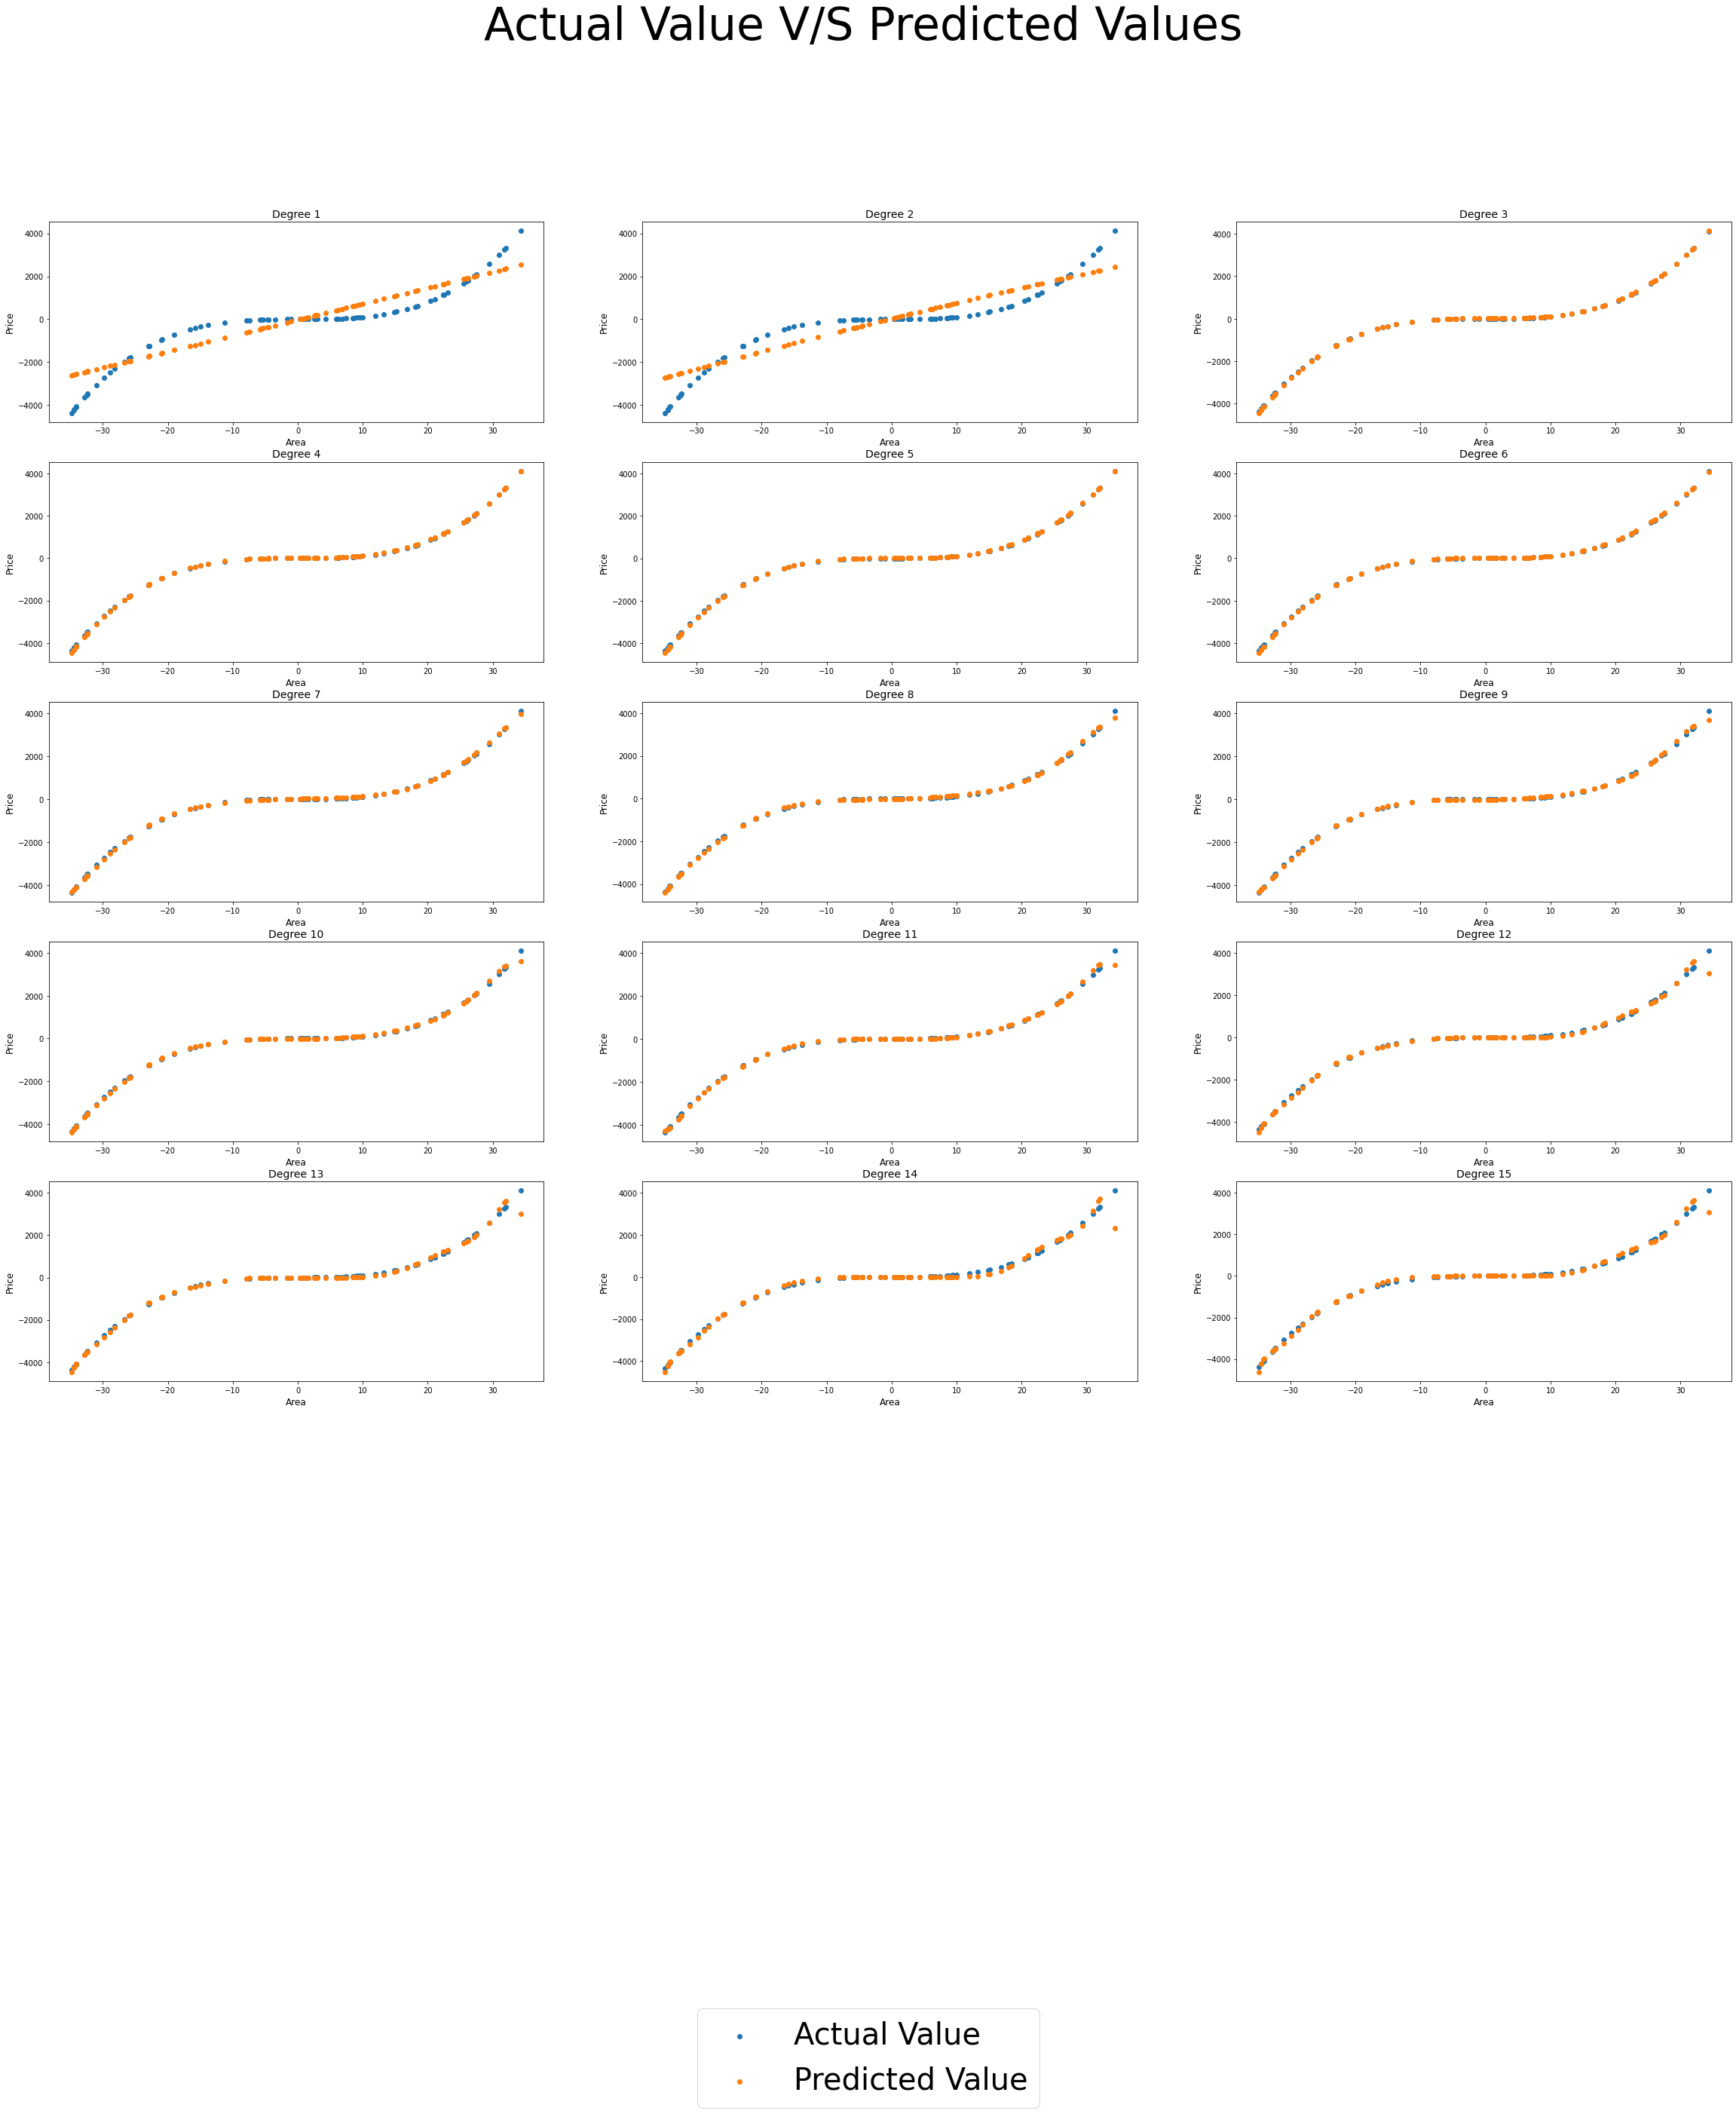

In [147]:
plt.figure(figsize=(40,40))

for i in range(1,16):
    plt.subplot(7,3,i)
    plt.scatter(test_['Area'], test_['Price'])
    plt.scatter(test_['Area'], y_predicted[i-1])
    plt.xlabel('Area', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    title = 'Degree ' + str(i)
    plt.title(title, fontsize=14)
plt.suptitle("Actual Value V/S Predicted Values", fontsize=60)
plt.figlegend(['Actual Value', 'Predicted Value'], loc='lower center', fontsize=40)
plt.show()

##### MSE vs Degree of Polynomial

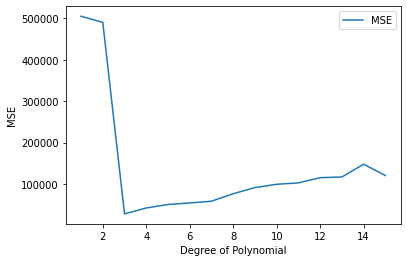

In [148]:

plt.plot([i for i in range(1, 16)], mse, label='MSE')   
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.legend()
plt.show()


#### Irreducible Error vs Degree of polynomial

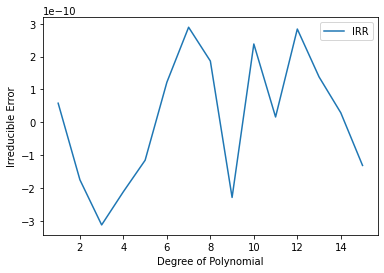

In [149]:

plt.plot([i for i in range(1, 16)], irr_err, label='IRR')   
plt.xlabel('Degree of Polynomial')
plt.ylabel('Irreducible Error')
plt.legend()
plt.show()


In [150]:

# Bias
print(tabulate({
    "degree": [j for j in range(1, 16)],
    "bias": bias,
    "variance": variance}, headers='keys', tablefmt='psql'))
# print(bias)
# print(variance)
# print(mse)
# print(irr_err)


+----------+----------+------------+
|   degree |     bias |   variance |
|----------+----------+------------|
|        1 | 572.841  |    16456.4 |
|        2 | 568.001  |    20244.9 |
|        3 |  20.2942 |    27352.7 |
|        4 |  19.1453 |    41412.1 |
|        5 |  20.1107 |    49859.8 |
|        6 |  20.2311 |    53641.6 |
|        7 |  30.1803 |    57051.1 |
|        8 |  38.7907 |    73999.6 |
|        9 |  37.0139 |    87529.3 |
|       10 |  35.0582 |    95021.2 |
|       11 |  38.3684 |    94665.9 |
|       12 |  58.8515 |    95889.6 |
|       13 |  60.2319 |    96774.5 |
|       14 |  91.0499 |    97048.3 |
|       15 |  77.6791 |    97830.9 |
+----------+----------+------------+


#### Bias And Variance

In [151]:
print(tabulate({
    "degree": [j for j in range(1, 16)],
    "Mean Sq Error": mse,
    "irreducible error": irr_err}, headers='keys', tablefmt='psql'))

+----------+-----------------+---------------------+
|   degree |   Mean Sq Error |   irreducible error |
|----------+-----------------+---------------------|
|        1 |        504882   |         5.82077e-11 |
|        2 |        490084   |        -1.74623e-10 |
|        3 |         28038.7 |        -3.11843e-10 |
|        4 |         42394.9 |        -2.10775e-10 |
|        5 |         50746.7 |        -1.15165e-10 |
|        6 |         54515.7 |         1.21872e-10 |
|        7 |         58672.1 |         2.89219e-10 |
|        8 |         76769.6 |         1.86446e-10 |
|        9 |         91596.2 |        -2.28283e-10 |
|       10 |         99533.5 |         2.38288e-10 |
|       11 |        102859   |         1.63709e-11 |
|       12 |        115447   |         2.83762e-10 |
|       13 |        117158   |         1.38243e-10 |
|       14 |        147910   |         2.91038e-11 |
|       15 |        120560   |        -1.30967e-10 |
+----------+-----------------+----------------

Plotting Variance vs Bias^2

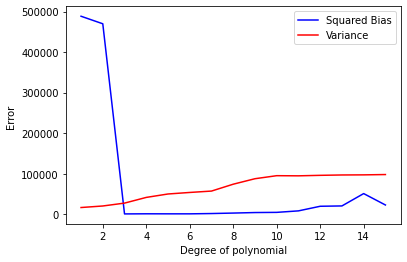

In [152]:
plt.plot(range(1, 16), sq_bias, 'b', label='Squared Bias')
plt.plot(range(1, 16), variance, 'r', label='Variance')
plt.xlabel('Degree of polynomial')
plt.ylabel('Error ')
plt.legend()
plt.show()